<a href="https://colab.research.google.com/github/mythri1996/Classify-cats-vs-dogs/blob/main/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify dog vs cat

UNZIP THE FILE


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("/content/drive/MyDrive/deeplearning/cnn_new_datasets/  DogsCats.zip")as file:
  file.extractall("")


Listing the directories

In [1]:
import os # #interacting with the operating system

In [ ]:
pets=os.listdir("/content/drive/MyDrive/deeplearning/cnn_new_datasets/kagglecatsanddogs_3367a/PetImages")

In [ ]:
print(pets)

['Cat', 'Dog']


In [ ]:
import cv2  # loads an image from the specified file

In [ ]:
x=[]
y=[]
for each in pets:#cat and  dog
  pet=os.listdir("/content/drive/MyDrive/deeplearning/cnn_new_datasets/kagglecatsanddogs_3367a/PetImages/" + each)
  for image in pet:
    #print(image)
    try:
      image="/content/drive/MyDrive/deeplearning/cnn_new_datasets/kagglecatsanddogs_3367a/PetImages/" + each  +'/' + image
      #print(image)
      img=cv2.imread(image,0)
      img=cv2.resize(img,(200,200))
      x.append(img)
      y.append(each)
    except:
      pass

In [ ]:
print(len(x))

24913


In [ ]:
print(len(y))

24913


In [ ]:
set(y)

{'Cat', 'Dog'}

Data preprocessing

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt #visulization
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from sklearn.model_selection import train_test_split # splitting train and test data
from sklearn.preprocessing import LabelEncoder # converting categorical to numerical

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x.shape,y.shape

((24913, 200, 200), (24913,))

reshape

In [ ]:
x=x.reshape(24913, 200, 200,1)

In [ ]:
x.shape

(24913, 200, 200, 1)

Label encoder

In [ ]:
le=LabelEncoder()
y_train1=le.fit_transform(y)
y_train1

array([0, 0, 0, ..., 1, 1, 1])

TRAIN_TEST-SPLIT

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y_train1,test_size=0.2,random_state=3)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(19930, 200, 200, 1) (19930,) (4983, 200, 200, 1) (4983,)


CNN

In [ ]:
model=Sequential()

In [ ]:
#convolution layer input shape=(200,200,1) 
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(200,200,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
#hidden layer
model.add(Dense(64,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 198, 198, 32)      320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 194, 194, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 301088)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                19269696  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',weighted_metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=50,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
399/399 [==============================] - 52s 128ms/step - loss: 42.1825 - accuracy: 0.5211 - val_loss: 0.6909 - val_accuracy: 0.5238
Epoch 2/10
399/399 [==============================] - 51s 127ms/step - loss: 0.6604 - accuracy: 0.5955 - val_loss: 0.7211 - val_accuracy: 0.5378
Epoch 3/10
399/399 [==============================] - 51s 128ms/step - loss: 0.5573 - accuracy: 0.6735 - val_loss: 0.7711 - val_accuracy: 0.5354
Epoch 4/10
399/399 [==============================] - 51s 127ms/step - loss: 0.4362 - accuracy: 0.7544 - val_loss: 1.1472 - val_accuracy: 0.5392
Epoch 5/10
399/399 [==============================] - 51s 128ms/step - loss: 0.3168 - accuracy: 0.8285 - val_loss: 1.5507 - val_accuracy: 0.5461
Epoch 6/10
399/399 [==============================] - 51s 128ms/step - loss: 0.2308 - accuracy: 0.8888 - val_loss: 1.9851 - val_accuracy: 0.5593
Epoch 7/10
399/399 [==============================] - 51s 127ms/step - loss: 0.1846 - accuracy: 0.9124 - val_loss: 2.1228 - val_a

Label

In [ ]:
label={0:'Cat',1:'Dog'}

Save the model

In [ ]:
model.save("catvsdog.h5")

Evaluate model

In [ ]:
model.evaluate(x_test,y_test)

156/156 [==============================] - 3s 21ms/step - loss: 3.0551 - accuracy: 0.5651


[3.055058717727661, 0.5651214122772217]

In [ ]:
from keras.models import load_model
model=load_model("catvsdog.h5")

IMAGE-1(CAT) prediction

In [ ]:
i1=cv2.imread("cat1.jpg",0)
i1.shape

(168, 300)

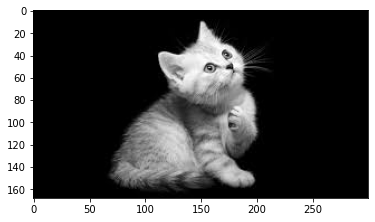

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(i1,cmap="gray")

In [ ]:
import numpy as np
imagea=np.resize(i1,new_shape=(200,200))
imagea.shape

(200, 200)

In [ ]:
image1 = imagea.reshape(1,200,200,1)
image1.shape

(1, 200, 200, 1)

In [ ]:
model.predict_classes(image1)[0][0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0

using label

In [ ]:
label[model.predict_classes(image1)[0][0]]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Cat'

IMAGE-2(CAT) prediction

In [ ]:
i2=cv2.imread("cat2.jpg",0)
i2.shape

(256, 197)

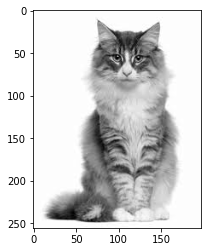

In [ ]:
plt.imshow(i2,cmap='gray')

In [ ]:
imageb=np.resize(i2,new_shape=(200,200))

In [ ]:
image2 = imageb.reshape(1,200,200,1)
image2.shape

(1, 200, 200, 1)

In [ ]:
label[model.predict_classes(image2)[0][0]]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Cat'

IMAGE-3(dog) prediction

In [ ]:
i3=cv2.imread("dog1.jpg",0)
i3.shape

(455, 600)

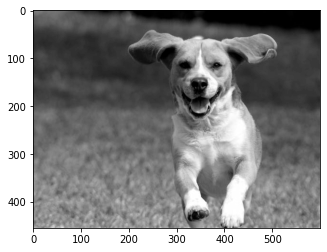

In [ ]:
plt.imshow(i3,cmap='gray')

In [ ]:
imagec=np.resize(i3,new_shape=(200,200))
image3 = imagec.reshape(1,200,200,1)
image3.shape

(1, 200, 200, 1)

In [ ]:
label[model.predict_classes(image3)[0][0]]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Dog'

**IMAGE**-4(dog) prediction

In [ ]:
i4=cv2.imread("dog2.jpg",0)
i3.shape

(455, 600)

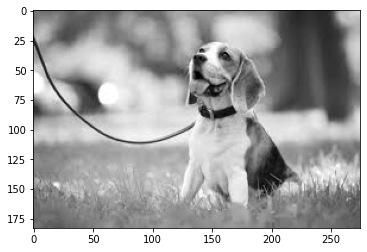

In [ ]:
plt.imshow(i4,cmap='gray')

In [ ]:
imaged=np.resize(i4,new_shape=(200,200))
image4 = imaged.reshape(1,200,200,1)
image4.shape

(1, 200, 200, 1)

In [ ]:
label[model.predict_classes(image4)[0][0]]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Dog'